<a href="https://colab.research.google.com/github/KJM94/pym/blob/main/src/2021%EB%85%84_4%EC%9B%94_19%EC%9D%BC_%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%8F%89%EA%B0%80_%EA%B6%8C%EC%A0%95%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 개요
- 교과목명: 빅데이터 분석/탐색적 데이터 분석
- 평가일: 2021년 4월 19일
- 평가자: 권정민

## Seaborn

### 산점도와 회귀선이 있는 산점도

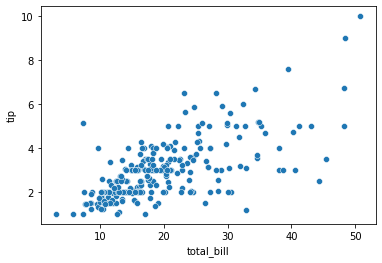

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

sns.scatterplot(x = "total_bill", y = "tip", data = tips)
plt.show()

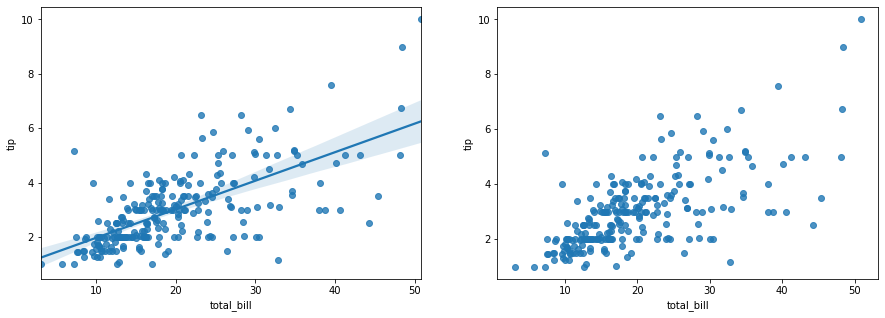

In [3]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

sns.regplot(x = "total_bill", 
            y = "tip", 
            data = tips, 
            ax = ax[0], 
            fit_reg = True)

sns.regplot(x = "total_bill", 
            y = "tip", 
            data = tips, 
            ax = ax[1], 
            fit_reg = False)

plt.show()

### 히스토그램/커널 밀도 그래프


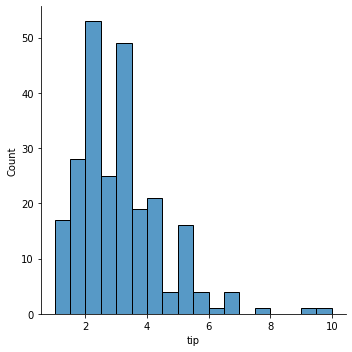

<Figure size 720x432 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

sns.displot(x = "tip", data = tips)
plt.figure(figsize=(10, 6))
plt.show()

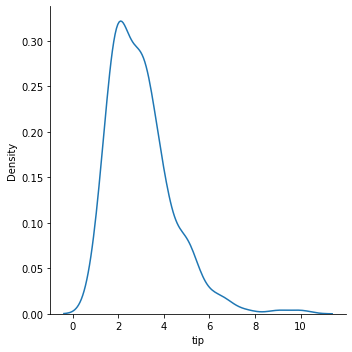

In [5]:
sns.displot(x="tip", kind="kde", data=tips)
plt.show()

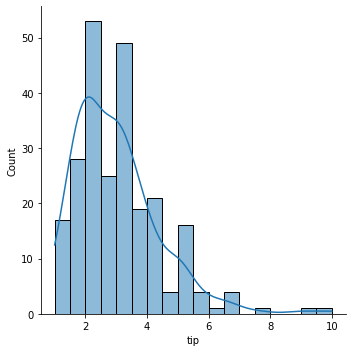

In [6]:
sns.displot(x="tip", kde=True, data=tips)
plt.show()

### 박스플롯

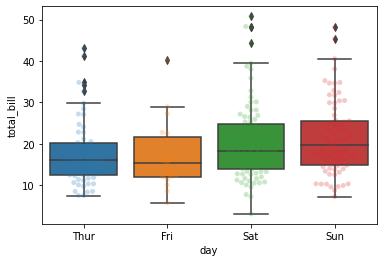

In [7]:
sns.boxplot(x = "day", y = "total_bill", data = tips)
sns.swarmplot(x = "day", y = "total_bill", data = tips, alpha = .25)
plt.show()

### 막대 그래프

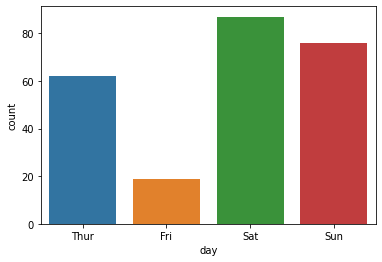

In [8]:
sns.countplot(x = "day", data = tips)
plt.show()

In [9]:
print(tips['day'].value_counts())
print("index: ", tips['day'].value_counts().index)
print("values: ", tips['day'].value_counts().values)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
index:  CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
values:  [87 76 62 19]


In [10]:
print(tips['day'].value_counts(ascending=True))

Fri     19
Thur    62
Sun     76
Sat     87
Name: day, dtype: int64


In [11]:
plt.show()

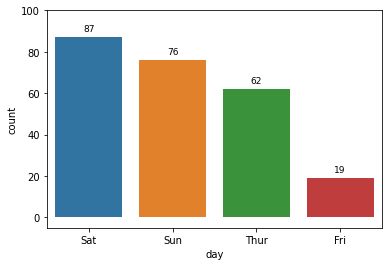

In [12]:
ax = sns.countplot(x = "day", data = tips, order = tips['day'].value_counts().index)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height+3, height, ha = 'center', size=9)
ax.set_ylim(-5, 100)
plt.show()

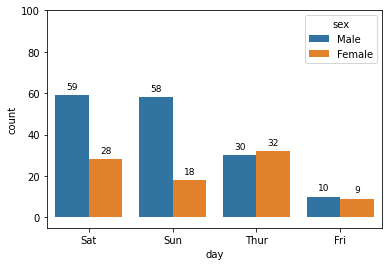

In [13]:
ax = sns.countplot(x = "day", data = tips, hue = "sex", dodge = True,
              order = tips['day'].value_counts().index)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height+3, height, ha = 'center', size=9)
ax.set_ylim(-5, 100)

plt.show()

### 상관관계 그래프

In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

mpg = sns.load_dataset("mpg")
print(mpg.shape) # 398 행, 9개 열

num_mpg = mpg.select_dtypes(include = np.number)
print(num_mpg.shape) # 398 행, 7개 열

(398, 9)
(398, 7)


In [15]:
num_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [16]:
num_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


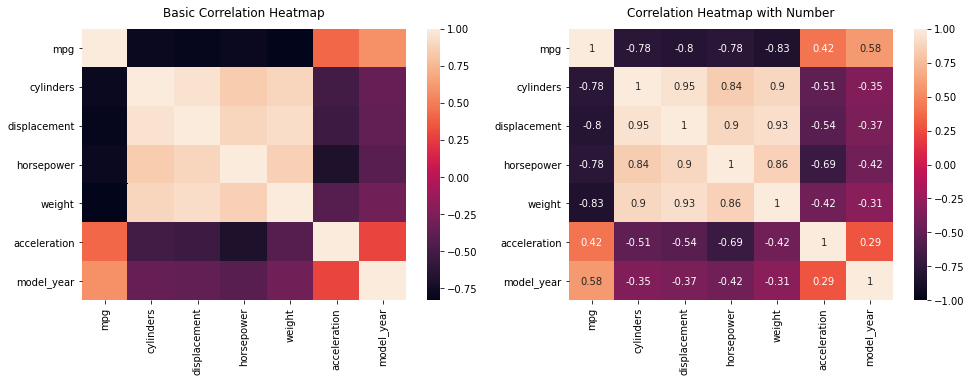

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

#  기본 그래프 [Basic Correlation Heatmap]
sns.heatmap(num_mpg.corr(), ax=ax[0])
ax[0].set_title('Basic Correlation Heatmap', pad = 12)

# 상관관계 수치 그래프 [Correlation Heatmap with Number]
sns.heatmap(num_mpg.corr(), vmin=-1, vmax=1, annot=True, ax=ax[1])
ax[1].set_title('Correlation Heatmap with Number', pad = 12)

plt.show()

In [18]:
print(int(True))
np.triu(np.ones_like(num_mpg.corr()))

1


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [19]:
mask = np.triu(np.ones_like(num_mpg.corr(), dtype=np.bool))
print(mask)

[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]


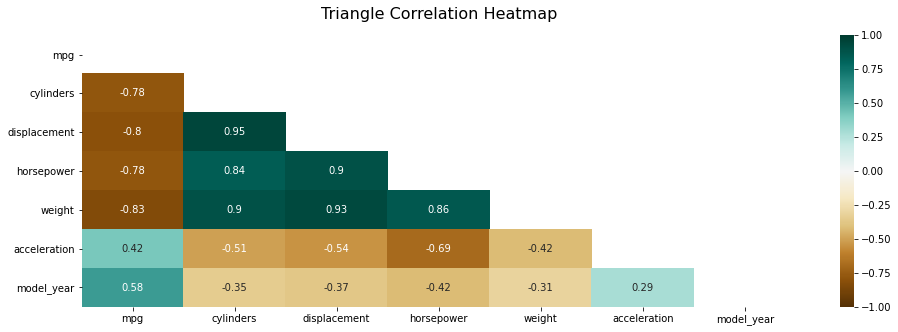

In [20]:
fig, ax = plt.subplots(figsize=(16, 5))

#  기본 그래프 [Basic Correlation Heatmap]
ax = sns.heatmap(num_mpg.corr(), mask=mask, 
                 vmin=-1, vmax = 1, 
                 annot=True, 
                 cmap="BrBG", cbar = True)
ax.set_title('Triangle Correlation Heatmap', pad = 16, size = 16)
fig.show()

## Intermediate Visualisation

### Summary

In [21]:
tips = sns.load_dataset("tips")
tips_day = tips.groupby("day").mean().reset_index()
print(tips_day)

    day  total_bill       tip      size
0  Thur   17.682742  2.771452  2.451613
1   Fri   17.151579  2.734737  2.105263
2   Sat   20.441379  2.993103  2.517241
3   Sun   21.410000  3.255132  2.842105


### Visualisation

In [22]:
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
print("The Best Day:", h_day)
print("The Highest Avg. Total Biil:", h_mean)

The Best Day: Sun
The Highest Avg. Total Biil: 21.41


Text(0, 0, 'Thur')
Text(0, 0, 'Fri')
Text(0, 0, 'Sat')
Text(0, 0, 'Sun')


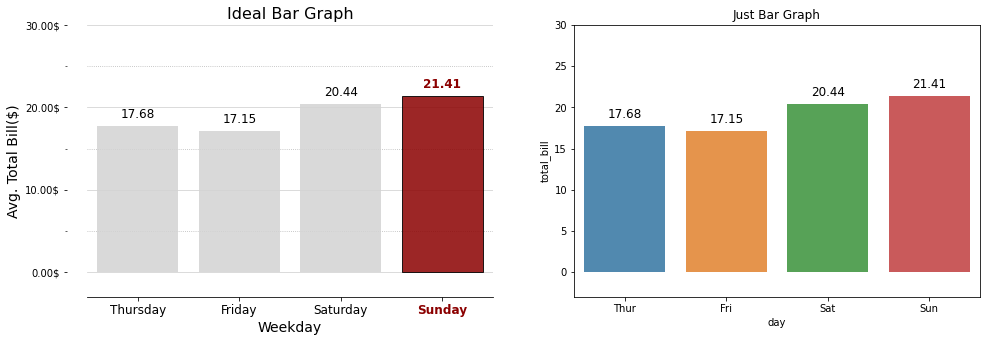

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12, fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()

### 회귀모형

In [24]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- 종속변수 tip
- 독립변수 나머지~

In [25]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [26]:
# specify linear model with statsmodels
lm_m1 = smf.ols(formula="tip ~ total_bill", data=tips)
lm_fit = lm_m1.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           6.69e-34
Time:                        01:26:15   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

- 현재 `Adj. R-squared: 0.454` 보다 높은 코드를 작성하세요. 
  + 예시
  + 참고자료: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html

In [39]:
lm_m2 = smf.ols(formula="tip ~ total_bill + size + sex + time + smoker", data=tips)
lm_fit = lm_m2.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     42.00
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           6.57e-31
Time:                        01:32:00   Log-Likelihood:                -347.78
No. Observations:                 244   AIC:                             707.6
Df Residuals:                     238   BIC:                             728.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6083      0.240      2.